In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
terrorRaw = pd.read_csv('GTD_Data/gtd_0717_final.csv', encoding='ISO-8859-1')
del terrorRaw['Unnamed: 0']
terrorRaw = terrorRaw[(terrorRaw["Year"] >= 2008) & (terrorRaw["Year"] <= 2017)]
terrorRaw = terrorRaw[["Year", "Country", "Casualities"]]
terrorRaw = terrorRaw.reset_index()
del terrorRaw['index']
terrorRaw.head()

,Year,Country,Casualities
0,2008,Philippines,0.0
1,2008,Iraq,67.0
2,2008,Iraq,10.0
3,2008,Iraq,5.0
4,2008,Iraq,1.0


In [3]:
country = terrorRaw[["Country"]]
country = country["Country"].value_counts().sort_values(ascending=False).to_frame()
countryList = country.index.to_list()
countryList

['Iraq',
 'Pakistan',
 'Philippines',
 'Somalia',
 'Ukraine',
 'Colombia',
 'United Kingdom',
 'United States',
 'China',
 'Georgia',
 'Australia',
 'Honduras']

In [4]:
gdpRaw = pd.read_csv("GTD_Data/world_gdp.csv")
gdpRaw = gdpRaw[["Country Name", "Country Code", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
gdpRaw.head()

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,-0.090708,-10.519748,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511
1,Afghanistan,AFG,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292
2,Angola,AGO,11.166138,0.858713,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207
3,Albania,ALB,7.499970,3.349994,3.706881,2.545405,1.417526,1.001988,1.770000,2.230000,3.350000,3.836620
4,Andorra,AND,-8.590004,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022


In [5]:
gdpRaw = gdpRaw.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Year", 
        value_name="GDP")
gdpRaw.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,2008,-0.090708
1,Afghanistan,AFG,2008,3.924984
2,Angola,AGO,2008,11.166138
3,Albania,ALB,2008,7.499970
4,Andorra,AND,2008,-8.590004


In [6]:
gdpRaw = gdpRaw[(gdpRaw["Country Name"].isin(countryList))]
del gdpRaw['Country Code']
gdpRaw.head()

,Country Name,Year,GDP
11,Australia,2008,3.657944
38,China,2008,9.654289
43,Colombia,2008,3.257048
79,United Kingdom,2008,-0.345861
80,Georgia,2008,2.418572


In [34]:
groupData = terrorRaw[["Year", "Country", "Casualities"]]
#groupData = groupData.groupby(['Year','Country'])['Casualities'].sum().to_frame()
groupData = groupData.groupby(['Year','Country']).agg({'Country': 'count', 'Casualities': 'sum'}).rename(columns={'Country': 'Total Attacks'})
groupData = groupData.reset_index()
groupData.head()

,Year,Country,Total Attacks,Casualities
0,2008,Australia,3,0.0
1,2008,China,20,189.0
2,2008,Colombia,133,323.0
3,2008,Georgia,33,75.0
4,2008,Iraq,1106,9414.0


In [35]:
terrorRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45899 entries, 0 to 45898
Data columns (total 3 columns):
Year           45899 non-null int64
Country        45899 non-null object
Casualities    43264 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [36]:
gdpRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 11 to 2625
Data columns (total 3 columns):
Country Name    120 non-null object
Year            120 non-null int64
GDP             110 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [37]:
gdpRaw['Year'] = gdpRaw['Year'].astype('int64')
gdpRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 11 to 2625
Data columns (total 3 columns):
Country Name    120 non-null object
Year            120 non-null int64
GDP             110 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [38]:
# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
mergedData = pd.merge(groupData, gdpRaw, how='outer', left_on=['Year', 'Country'], right_on=['Year', 'Country Name'])
mergedData = mergedData.sort_values(by=['Year', 'Country'])
mergedData.head()

,Year,Country,Total Attacks,Casualities,Country Name,GDP
0,2008,Australia,3.0,0.0,Australia,3.657944
1,2008,China,20.0,189.0,China,9.654289
2,2008,Colombia,133.0,323.0,Colombia,3.257048
3,2008,Georgia,33.0,75.0,Georgia,2.418572
4,2008,Iraq,1106.0,9414.0,Iraq,8.228107


In [41]:
mergedData = mergedData.dropna(axis='columns', how='all')
mergedData.head()

,Year,Country,Total Attacks,Casualities,Country Name,GDP
0,2008,Australia,3.0,0.0,Australia,3.657944
1,2008,China,20.0,189.0,China,9.654289
2,2008,Colombia,133.0,323.0,Colombia,3.257048
3,2008,Georgia,33.0,75.0,Georgia,2.418572
4,2008,Iraq,1106.0,9414.0,Iraq,8.228107


In [57]:
mergedData = mergedData[['Year', 'Country', 'Total Attacks', 'Casualities', 'GDP']]
mergedData.head(12)

,Year,Country,Total Attacks,Casualities,GDP
0,2008,Australia,3.0,0.0,3.657944
1,2008,China,20.0,189.0,9.654289
2,2008,Colombia,133.0,323.0,3.257048
3,2008,Georgia,33.0,75.0,2.418572
4,2008,Iraq,1106.0,9414.0,8.228107
5,2008,Pakistan,568.0,2941.0,1.701405
6,2008,Philippines,276.0,601.0,4.152757
7,2008,Somalia,172.0,966.0,NaN
8,2008,Ukraine,1.0,2.0,2.304029
9,2008,United Kingdom,39.0,8.0,-0.345861


In [60]:
USA = mergedData.loc[mergedData['Country'] == 'United States']
USA.head(10)

,Year,Country,Total Attacks,Casualities,GDP
10,2008,United States,18.0,15.0,-0.136580
22,2009,United States,11.0,58.0,-2.536757
33,2010,United States,17.0,21.0,2.563767
44,2011,United States,10.0,2.0,1.550836
54,2012,United States,20.0,14.0,2.249546
66,2013,United States,20.0,459.0,1.842081
78,2014,United States,29.0,45.0,2.451973
89,2015,United States,38.0,112.0,2.880910
101,2016,United States,64.0,207.0,1.567215
113,2017,United States,65.0,1027.0,2.217010


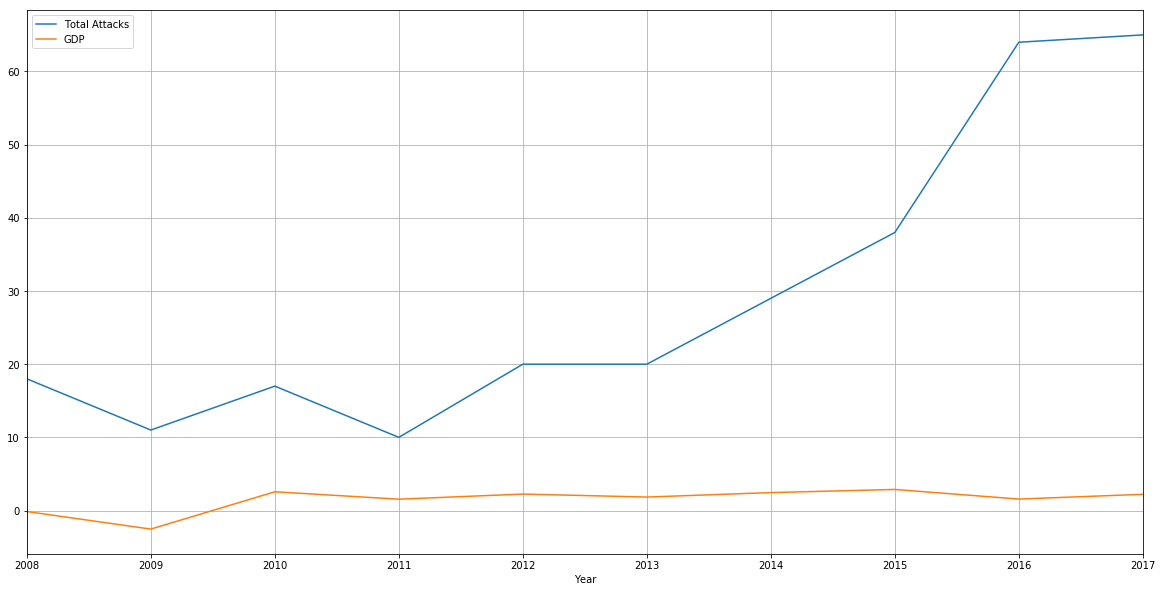

In [88]:
a = mergedData.loc[mergedData['Country'] == 'United States'].plot(x="Year", y="Total Attacks", kind="line")
mergedData.loc[mergedData['Country'] == 'United States'].plot(x="Year", y="GDP", kind="line", ax=a)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(20,10)
#plt.ylim(-5, 70)

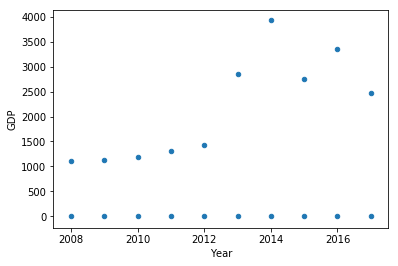

In [83]:
ax = mergedData.loc[mergedData['Country'] == 'Iraq'].plot(x="Year", y="Total Attacks", kind="scatter")
mergedData.loc[mergedData['Country'] == 'Iraq'].plot(x="Year", y="GDP", kind="scatter", ax=ax)